# Obtain results for question 2

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches
import statsmodels.api as sm

from datetime import datetime
figure_path = "/Users/conorosully/Google Drive/Trinity/S2/Applied Statistical Modelling/A2/doc/Sections/Figures/{}"


In [2]:
question2_1 = pd.read_csv("data/question2_1.csv")
print(len(question2_1))
print(question2_1.columns)
question2_1.head()

7148
Index(['business_id', 'name', 'latitude', 'longitude', 'review_count', 'stars',
       'is_open', 'Italian', 'Japanese', 'Pizza', 'Coffee & Tea', 'stars_1',
       'stars_2', 'stars_3', 'stars_4', 'stars_5', 'length', 'last_year',
       'last_date'],
      dtype='object')


,business_id,name,latitude,longitude,review_count,stars,is_open,Italian,Japanese,Pizza,Coffee & Tea,stars_1,stars_2,stars_3,stars_4,stars_5,length,last_year,last_date
0,l09JfMeQ6ynYs5MCJtrcmQ,Alize Catering,43.71140,-79.39934,12,3.0,0,1,0,0,0,2,2,4,3,1,1475.750000,2012,1334444400
1,1K4qrnfyzKzGgJPBEcJaNQ,Chula Taberna Mexicana,43.66926,-79.33590,39,3.5,1,0,0,0,0,0,4,11,20,4,643.153846,2017,1511827200
2,nbhBRhZtdaZmMMeb2i02pg,Sunnyside Grill,43.78182,-79.49043,3,5.0,1,0,0,0,0,0,0,0,0,3,218.333333,2017,1512777600
3,FXHfcFVEfI1vVngW2gVOpw,Bampot House of Tea & Board Games,43.66158,-79.40888,55,4.0,1,0,0,0,1,4,3,4,14,30,838.800000,2017,1510099200
4,VXH7zXcZzXlmAVN8GSjGRQ,Thai Express,43.77488,-79.49462,5,3.0,1,0,0,0,0,1,0,2,1,1,341.400000,2017,1512172800


NameError: name 'question2' is not defined

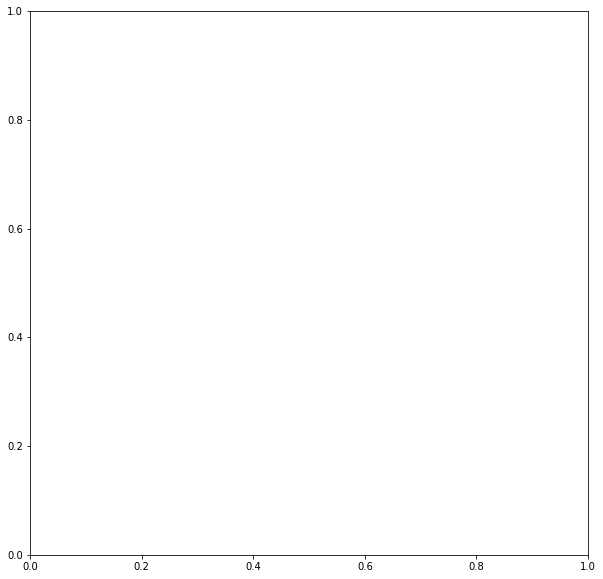

In [4]:
fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(10,10) )
ax = sns.heatmap(question2.isnull(),cbar=False,cmap='viridis')
ax.vlines(list(range(len(question2.columns))), *ax.get_ylim())

#Create legend
values = np.unique(['Not Missing',"Missing"])
colors = [(0.267004, 0.004874, 0.329415, 1.0),(0.993248, 0.906157, 0.143936, 1.0)]
patches = [ mpatches.Patch(color=colors[0], label="Not Missing" ),
           mpatches.Patch(color=colors[1], label="Missing")]
ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 20} )
ax.set(xlabel= 'Variables',ylabel='Rows')
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

#fig.savefig("figures/missing_data_heatmap.png", bbox_inches='tight')

### Get balanced dataset

In [29]:
closed = question2_1[question2_1['is_open']==0]
opened = question2_1[question2_1['is_open']==1].sample(2180,random_state=100)
question2_1 = pd.concat([closed,opened])
len(question2_1)

4360

2180 closed resturants and 4968 open resturants. We select all 2180 closed resturants and randomly sample 2180 resturants from the open resturants

# Exploration

#### Latitude and longitude

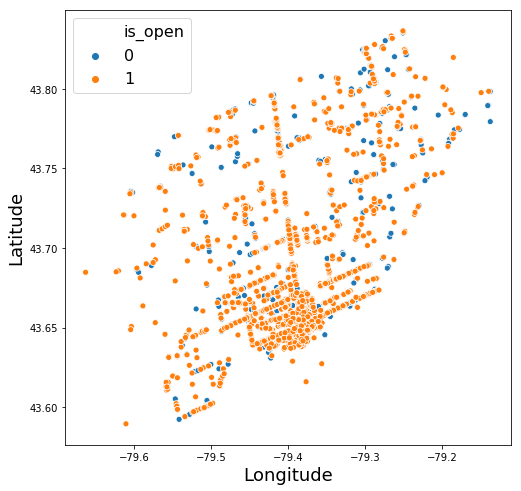

In [76]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(question2_1['longitude'],question2_1['latitude'],hue=question2_1['is_open'])
plt.xlabel("Longitude",size=18)
plt.ylabel('Latitude',size=18)
plt.legend(prop={'size': 16})
filename = "q2_exploration_latlong.eps"
plt.savefig(figure_path.format(filename),format='eps',dpi=1000)

There seems to be a cluster of open resturants at latitude = 43.65 and Longitude = -79.4. There also seems to be no obvious locations where there are more closed resturants.

### Category indicator variables

In [89]:
confusion_matrix(question2_1['is_open'],question2_1['Italian'])

array([[1970,  210],
       [2023,  157]])

In [95]:
confusion_matrix(question2_1['is_open'],question2_1['Pizza'])

array([[2060,  120],
       [2002,  178]])

Italian the confusion matrices show different distributions for Italian ( 0 more popular). We can see Itlain = 0 the resturnt is more likel to be open (2023 >1970) and when Italian = 1, the resturant is more likely to be closed (210 >157). The oposit is true fo Pizza. This was expected as Italian was more popular amongst closed resturants and Pizza more liely ampngst open. We could expct similar results for Japanese and Coffee & Tea categories.

# Stars

/Users/conorosully/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "
/Users/conorosully/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "


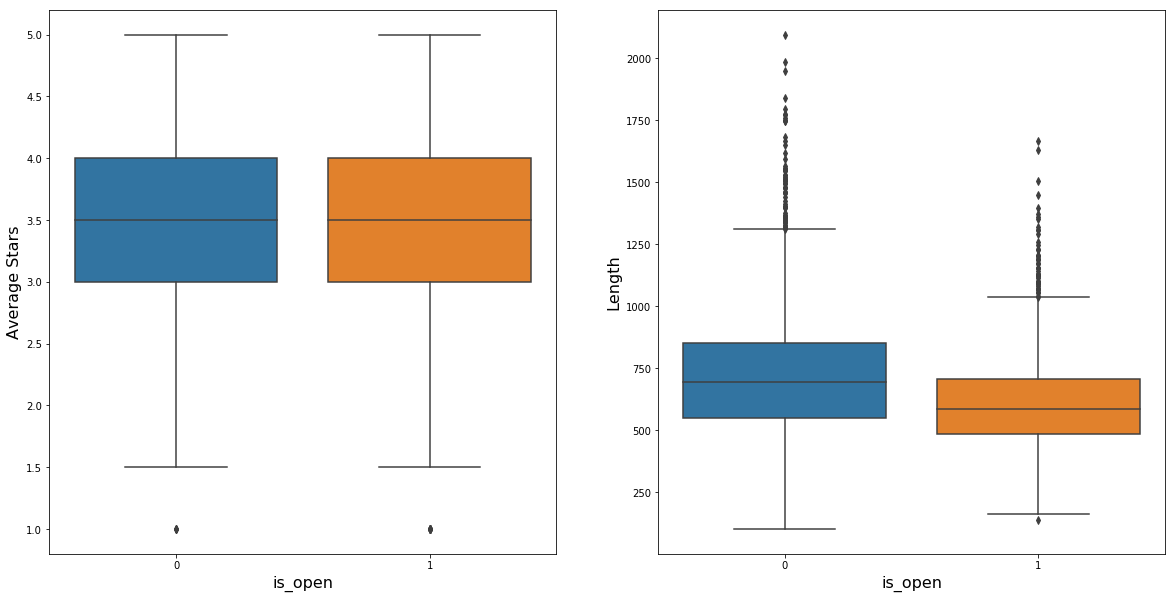

In [5]:
fig, ax = plt.subplots( nrows=1, ncols=2,figsize=(20,10))

plt.axes(ax[0])
sns.boxplot(y=question2_1['stars'],x=question2_1['is_open'],ax=ax[0])
plt.ylabel("Average Stars",size=16)
plt.xlabel('is_open',size=16)

plt.axes(ax[1])
sns.boxplot(y=question2_1['length'],x=question2_1['is_open'],ax=ax[1])
plt.ylabel("Length",size=16)
plt.xlabel('is_open',size=16)

filename = "exploration_boxplots.eps"
plt.savefig(figure_path.format(filename),format='eps',dpi=1000)

In [6]:
bar_plot_data = pd.DataFrame(columns=["Star","is_open","mean"])

star = []
is_open = []
mean_count = []
for i,s in enumerate(['stars_1','stars_2', 'stars_3', 'stars_4', 'stars_5']):
    star.append("{} Star".format(i+1))
    star.append("{} Star".format(i+1))
    
    is_open.append(0)
    is_open.append(1)
    
    mean_count.append(round(question2_1[question2_1["is_open"]==0][s].mean(),2))
    mean_count.append(round(question2_1[question2_1["is_open"]==1][s].mean(),2))

star.append("No. Reviews")
star.append("No. Reviews")
    
is_open.append(0)
is_open.append(1)

mean_count.append(round(question2_1[question2_1["is_open"]==0]["review_count"].mean(),2))
mean_count.append(round(question2_1[question2_1["is_open"]==1]["review_count"].mean(),2))
    

bar_plot_data['Star'] = star
bar_plot_data['is_open'] = is_open
bar_plot_data['mean'] = mean_count

bar_plot_data

,Star,is_open,mean
0,1 Star,0,2.57
1,1 Star,1,4.62
2,2 Star,0,3.00
3,2 Star,1,5.21
4,3 Star,0,4.54
5,3 Star,1,9.48
6,4 Star,0,7.26
7,4 Star,1,16.96
8,5 Star,0,5.24
9,5 Star,1,14.78


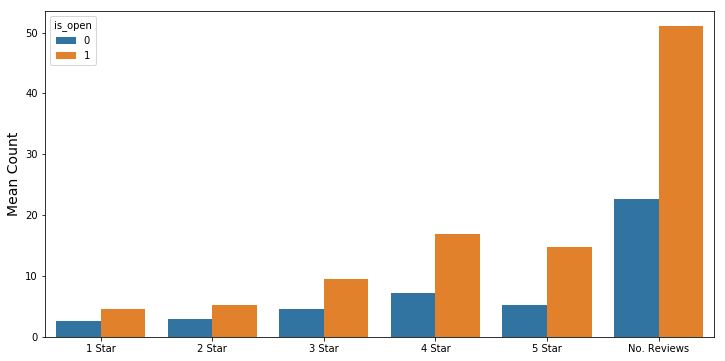

In [7]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x="Star", y="mean", hue="is_open", data=bar_plot_data)
plt.ylabel("Mean Count",size=14)
plt.xlabel('',size=14)
filename = "exploration_barplot.eps"
plt.savefig(figure_path.format(filename),format='eps',dpi=1000)

THe individual star counts may provide more infomation that the averge star rating. Figure X show that distribution of counts appear to be differnet for open and closed resturnts. However, this appears to be simply becasue the total number of reviews for open resturats is on aveage greater than for closed resturants. If you look closely all these variables appear to be twice as high. In other words, the distribution is the same for all the variables. This suggest there may be significant multicorealtions between these variables and that only one of these varibales is nessary to include in the model. 
<br>
Heatmap of pearson correlations confirms this. We can see Review_count is highly correlatied with star 2 to 5. It is not as highly correlated with star 1. None the less, to simply the model we will just use review_count as a predicition variable. Also multi-correlations amongst star values...

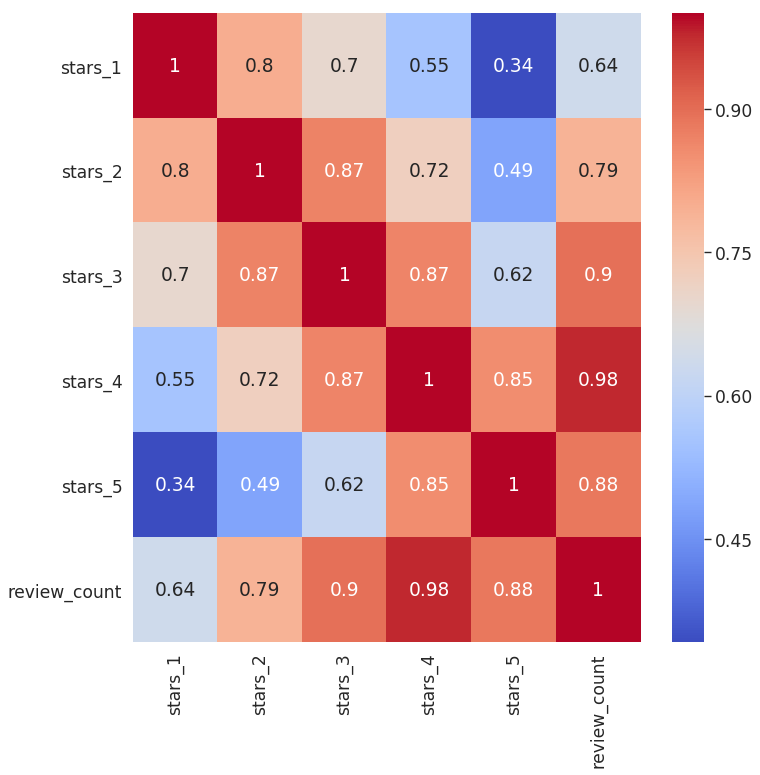

In [8]:
plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.set(font_scale=1.4)
ax = plt.axes()
data = question2_1[['stars_1','stars_2', 'stars_3', 'stars_4', 'stars_5','review_count']].corr()
sns.heatmap(data,cmap='coolwarm',ax=ax,annot=True,fmt='.2g')
plt.yticks(rotation=360)
plt.tight_layout()
filename = "exploration_heatmap.eps"
plt.savefig(figure_path.format(filename),format='eps',dpi=1000)

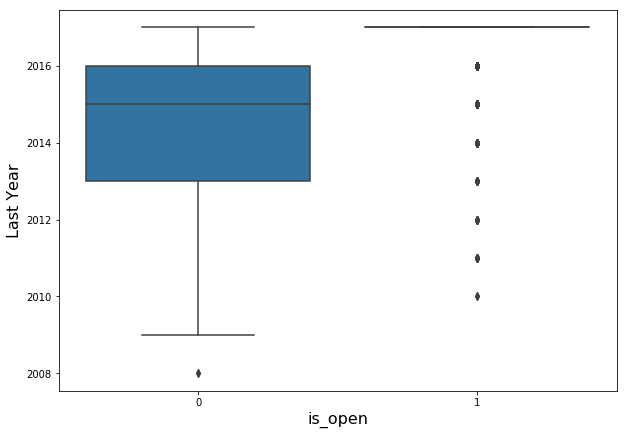

In [57]:
fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(10,7))

sns.boxplot(y=question2_1['last_year'],x=question2_1['is_open'])
plt.ylabel("Last Year",size=16)
plt.xlabel('is_open',size=16)

filename = "lastyear_boxplot.eps"
plt.savefig(figure_path.format(filename),format='eps',dpi=1000)


In [63]:
question2_1.head()

,business_id,name,latitude,longitude,review_count,stars,is_open,Italian,Japanese,Pizza,Coffee & Tea,stars_1,stars_2,stars_3,stars_4,stars_5,length,last_year,last_date
0,l09JfMeQ6ynYs5MCJtrcmQ,Alize Catering,43.71140,-79.39934,12,3.0,0,1,0,0,0,2,2,4,3,1,1475.750000,2012,1334444400
6,1nhf9BPXOBFBkbRkpsFaxA,Mirage Grill & Lounge,43.70746,-79.39429,6,2.0,0,0,0,0,1,3,1,1,1,0,1006.166667,2011,1318028400
14,PmDhZiyiHI6O3RJXXojJcA,Pizza Pizza,43.72484,-79.28992,4,2.0,0,0,0,1,0,3,0,0,1,0,283.250000,2016,1482796800
22,z-5YXiSmZchuoANnqfp1vg,Pi-Tom's Thai Cuisine,43.65681,-79.37423,13,3.5,0,0,0,0,0,1,2,2,6,2,753.538462,2013,1379286000
23,4-YKQyhDR2bZ26AYgZ7aFg,Royal Boonsik,43.66417,-79.41516,30,4.0,0,0,0,0,0,2,0,2,13,13,588.133333,2017,1489795200


# Logistic regression
<br>
https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.fit_regularized.html
https://www.statsmodels.org/devel/generated/statsmodels.discrete.discrete_model.Logit.html

In [45]:
closed = question2_1[question2_1['is_open']==0]
opened = question2_1[question2_1['is_open']==1].sample(2180,random_state=100)
question2_1 = pd.concat([closed,opened])
len(question2_1)

4360

In [30]:
def crossValid(x):
    
    X = question2_1[x]
    X = sm.add_constant(X)
    y = question2_1['is_open']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=90)
    
    
    accuracy = []

    X_folds = np.array_split(X_train.values, 10)
    y_folds = np.array_split(y_train, 10)

    for i in range(10):
        X_fold = X_folds[0:i] + X_folds[i+1:10]
        X_fold = [y for x in X_fold for y in x]

        X_hold = X_folds[i]

        y_fold = y_folds[0:i] + y_folds[i+1:10]
        y_fold = [y for x in y_fold for y in x]

        y_hold = y_folds[i]

        results = sm.Logit(y_fold,X_fold).fit(disp=0)

        predictions = np.around(results.predict(X_hold))
        accuracy.append(accuracy_score(y_hold,predictions))
    return sum(accuracy)/10

In [59]:
x = ['latitude',"longitude","review_count", 'Italian', 'Japanese', 'Pizza', 'Coffee & Tea','length']
C = crossValid(x) 
print(C)

x = ['latitude',"longitude","review_count",'stars', 'Italian', 'Japanese', 'Pizza', 'Coffee & Tea','length']
C = crossValid(x) 
print(C)

x = ['latitude',"longitude","review_count",'stars', 'Italian', 'Japanese', 'Pizza', 'Coffee & Tea','length','last_year']
C = crossValid(x) 
print(C)

x = ["last_year"]
C = crossValid(x) 
print(C)


0.671755076076232
0.6715006231500233
0.8621390922781327
0.8761554240016617


In [47]:
x = ['latitude',"longitude","review_count",'stars', 'Italian', 'Japanese', 'Pizza', 'Coffee & Tea','length']
X = question2_1[x]
X = sm.add_constant(X)
y = question2_1['is_open']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=90)

results = sm.Logit(y_train,X_train).fit_regularized(alpha=0)
print(results.summary())

predictions = round(results.predict(X_test))
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.6088338526597717
            Iterations: 72
            Function evaluations: 84
            Gradient evaluations: 72
                           Logit Regression Results                           
Dep. Variable:                is_open   No. Observations:                 3924
Model:                          Logit   Df Residuals:                     3914
Method:                           MLE   Df Model:                            9
Date:                Tue, 09 Apr 2019   Pseudo R-squ.:                  0.1216
Time:                        14:49:07   Log-Likelihood:                -2389.1
converged:                       True   LL-Null:                       -2719.9
                                        LLR p-value:                1.193e-136
                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

In [64]:
x = ['latitude',"longitude","review_count", 'Italian', 'Japanese', 'Pizza', 'Coffee & Tea','length','last_year']
X = question2_1[x]
X = sm.add_constant(X)
y = question2_1['is_open']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=90)

results = sm.Logit(y_train,X_train).fit_regularized(alpha=0)
summary = results.summary()
print(summary)

predictions = round(results.predict(X_test))
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.40474256314023194
            Iterations: 86
            Function evaluations: 101
            Gradient evaluations: 86
                           Logit Regression Results                           
Dep. Variable:                is_open   No. Observations:                 3924
Model:                          Logit   Df Residuals:                     3914
Method:                           MLE   Df Model:                            9
Date:                Tue, 09 Apr 2019   Pseudo R-squ.:                  0.4161
Time:                        15:11:06   Log-Likelihood:                -1588.2
converged:                       True   LL-Null:                       -2719.9
                                        LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

,coef,std err,z,P>|z|,[0.025,0.975]
const,-3124.7505,143.833,-21.725,0.000,-3406.659,-2842.842
latitude,1.6488,1.052,1.567,0.117,-0.414,3.711
longitude,-0.8720,0.786,-1.109,0.267,-2.412,0.668
review_count,0.0030,0.001,3.469,0.001,0.001,0.005
Italian,-0.4132,0.173,-2.391,0.017,-0.752,-0.074
Japanese,-0.4114,0.174,-2.367,0.018,-0.752,-0.071
Pizza,0.3596,0.186,1.931,0.053,-0.005,0.725
Coffee & Tea,-0.2182,0.176,-1.241,0.215,-0.563,0.127
length,-0.0012,0.000,-5.249,0.000,-0.002,-0.001
last_year,1.4802,0.056,26.446,0.000,1.370,1.590


In [74]:
filename = "logistic_regression.eps"
print(summary.tables[1].as_csv())

            ,   coef   , std err ,    z    ,P>|z| ,  [0.025 ,  0.975] 
const       ,-3124.7505,  143.833,  -21.725, 0.000,-3406.659,-2842.842
latitude    ,    1.6488,    1.052,    1.567, 0.117,   -0.414,    3.711
longitude   ,   -0.8720,    0.786,   -1.109, 0.267,   -2.412,    0.668
review_count,    0.0030,    0.001,    3.469, 0.001,    0.001,    0.005
Italian     ,   -0.4132,    0.173,   -2.391, 0.017,   -0.752,   -0.074
Japanese    ,   -0.4114,    0.174,   -2.367, 0.018,   -0.752,   -0.071
Pizza       ,    0.3596,    0.186,    1.931, 0.053,   -0.005,    0.725
Coffee & Tea,   -0.2182,    0.176,   -1.241, 0.215,   -0.563,    0.127
length      ,   -0.0012,    0.000,   -5.249, 0.000,   -0.002,   -0.001
last_year   ,    1.4802,    0.056,   26.446, 0.000,    1.370,    1.590


If we try to add last_year or last_date to this model we get 'LinAlgError: Singular matrix'. The reason for this is unclear but it is potential because these very are very correlated to the target variable. In other words, the data can be perfectly sperated by these variables. With just one variable 'last_year' we can obtain a model with 87% accuracy. if we try to produce a model with last_date we get the same error as before

In [62]:
predictions = [0 if x <2017 else 1 for x in X_test['last_year']]

print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

0.8990825688073395
[[198  24]
 [ 20 194]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       222
           1       0.89      0.91      0.90       214

   micro avg       0.90      0.90      0.90       436
   macro avg       0.90      0.90      0.90       436
weighted avg       0.90      0.90      0.90       436



If we use the simple heuristic of x<2017 we obtain an accuracy of 0.89

# SVM

In [7]:
X = question2[['latitude',"longitude","review_count","stars"]]
y = question2['is_open']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=90)
model = SVC()
model.fit(X_train,y_train)

/Users/conorosully/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
predictions = model.predict(X_test)
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

0.6825174825174826
[[  0 227]
 [  0 488]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       227
           1       0.68      1.00      0.81       488

   micro avg       0.68      0.68      0.68       715
   macro avg       0.34      0.50      0.41       715
weighted avg       0.47      0.68      0.55       715



/Users/conorosully/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/conorosully/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/conorosully/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
